# Law of large number and heavy-tailed distribution

#### Written for the QuantEcon Indian Summer Workshop (August 2022)
#### Author: [Shu Hu](https://shu-hu.com/intro.html)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

Dear students, please read the following QuantEcon lecture before starting:
- https://python.quantecon.org/heavy_tails.html

### Exercise 1 (LLN)
Consider

In [2]:
from scipy.stats import norm

### Exercise 1.1

Take the ``norm`` function above to 
- generate $N=1000$ independent draws from the standard normal distribution and
- store them to a variable called ``data1``.

### Solution

In [3]:
N = 1_000
distribution = norm()
data1 = distribution.rvs(N)

### Exercise 1.2

Write a function to replicate the job we have done in Exercise 1.1. 
That is, 
- take the number of draws $N$ and the type of distribution ``dist=norm`` and
- return $N$ independent draws from the standard normal distribution.

### Solution

In [4]:
def generate_sample(N, 
                    dist=norm): # If you don't enter norm, then you won't get the same result as Exercise 1.1.
    distribution = dist()
    return distribution.rvs(N)

In [5]:
N = 1_000
data1 = generate_sample(N, dist=norm)

### Exercise 1.3

In [6]:
from scipy.stats import cauchy, uniform

Generate 3 different examples of $N=1000$ draws from the standard normal distribution, the [Cauchy distribution](https://en.wikipedia.org/wiki/Cauchy_distribution), and the uniform distribution, respectively. 

Which ways you choose: Exercise 1.1 or Exercise 1.2?

### Solution

If we use the way from Exercise 1.1, then 

In [7]:
distribution = norm()
data_norm1 = distribution.rvs(N)

In [8]:
distribution = cauchy()
data_cauchy1 = distribution.rvs(N)

In [9]:
distribution = uniform()
data_uniform1 = distribution.rvs(N)

But if we use the method from Exercise 1.2, then

In [10]:
data_norm2 = generate_sample(N, dist=norm)

In [11]:
data_cauchy2 = generate_sample(N, dist=cauchy)

In [12]:
data_uniform2 = generate_sample(N, dist=uniform)

We can see that with the function, we do not repeat ourselves to some extent.

### Exercise 1.4

Write a function that 
- takes a sample of size $N$ and 
- returns the sample mean of each of the first $n$ observations, where $n=1, \cdots, N$.

### Solution

In [13]:
# Compute sample mean at each n
def sample_means(data):
    N = len(data)
    sample_mean = np.empty(N)
    for n in range(1, N):
        sample_mean[n] = np.mean(data[:n])
    return sample_mean

### Exercise 1.5 

Write a function that 
- takes the sample mean of each of the first $n$ observations, where $n=1, \cdots, N$, from the sample of size $N$ and
- plots the sample mean on $y$-axis and the number of sample mean $n$ on $x$-axis.

### Solution

In [14]:
def plot_samplemeans(sample_mean):
    fig, ax = plt.subplots()
    
    N = len(sample_mean)

    ax.plot(range(N), sample_mean, alpha=0.6, label='$\\bar{X}_n$')
    ax.plot(range(N), np.zeros(N), 'k--', lw=0.5)
    ax.legend()

    plt.show()

### Exercise 1.6

Using 
- the sample generated from Exercise 1.1 and 
- functions defined from Exercise 1.4 and Exercise 1.5, 

To 
- compute the sample mean of each of the first $n$ observations, where $n=1, \cdots, N$ and $N=1000$ and
- plot the sample means on $y$-axis and the number $n$ of sample means on $x$-axis.

Repeat the above process 10 times. 

Question: whether the law of large number still holds in this case?

### Solution

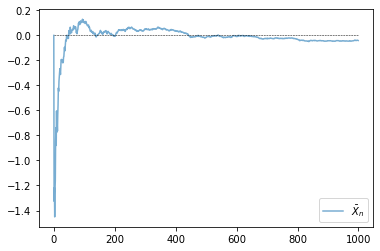

In [15]:
sample_mean1 = sample_means(data1)
plot_samplemeans(sample_mean1)

Here we can see the law of large numbers holds when the sample values follow a standard normal distribution.

### Exercise 2 (LLN vs heavy-tailed distribution)

Recall the Cauchy distribution from Exercise 1.3. 

Now generate $N=1000$ independent draws from the Cauchy distribution, and also
1. compute the sample mean of each of the first $n$ observations, where $n=1, \cdots, N$.
2. plot the sample mean on $y$-axis and the number of sample mean $n$ on $x$-axis. 

Repeat the above process 10 times. 

Question: whether the law of large number still holds in this case?

### Solution

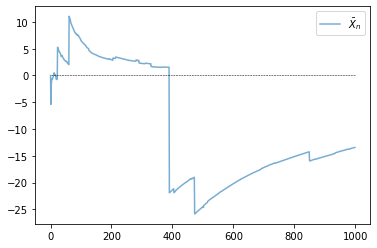

In [16]:
N = 1000
data2 = generate_sample(N, dist=cauchy)
sample_mean2 = sample_means(data2)
plot_samplemeans(sample_mean2)

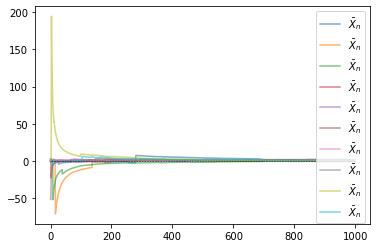

In [17]:
# Not required by students
# let's plot the 10 examples in the same figure, repeat it several times

fig, ax = plt.subplots()
    
for i in range(10):
    sample_mean = sample_means(generate_sample(N, dist=cauchy))
    ax.plot(range(N), sample_mean, alpha=0.6, label='$\\bar{X}_n$')

ax.plot(range(N), np.zeros(N), 'k--', lw=0.5)
ax.legend()

plt.show()

Here we can see that the law of large number does not hold when the sample values follow a heavy-tailed distribution.

### Exercise 3 (Pareto distribution and loglog rank-size plot)

Consider another famous type of heavy-tailed distribution, called [Pareto distribution](https://en.wikipedia.org/wiki/Pareto_distribution). 

In [18]:
from scipy.stats import pareto

### Exercise 3.1 

Generates $N=1000$ independent draws from the Pareto distribution with the shape parameter $b=1$.

What's the population mean and sample mean right now?

### Solution

In [19]:
N = 1_000
b = 1
distribution = pareto(b=1)
data3 = distribution.rvs(N)

In [20]:
sample_mean3 = sample_means(data3)

In [21]:
distribution.mean()

inf

### Exercise 3.2

Many important distributions in Economics and Finance, such as the distributions of firm size, income or wealth, follow a Pareto distribution. The so-called [rank-size plot](https://python.quantecon.org/heavy_tails.html#rank-size-plots) helps verify whether a sample is drawed from a Pareto distribution.

Use [rank_size](https://quanteconpy.readthedocs.io/en/latest/tools/inequality.html?highlight=rank#quantecon.inequality.rank_size) method from [quantecon](https://quanteconpy.readthedocs.io/en/latest/index.html) library to write a function that
- takes a sample and
- returns a [loglog](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot) rank-size plot with the log rank on $x$-axis and the log size on $y$-axis.

Use the function defined above to plot the loglog rank-size plot for sample produced from Exercise 3.1.

### Solution

In [22]:
import quantecon as qe

In [23]:
def ll_ranksize(data):
    rank_data, size_data = qe.rank_size(data)

    fig, ax = plt.subplots()

    ax.loglog(rank_data, size_data, 'o', markersize=3.0, alpha=0.5)
    ax.set_xlabel("log rank")
    ax.set_ylabel("log size")

    plt.show()

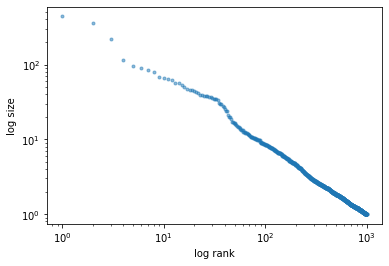

In [24]:
ll_ranksize(data3)

The loglog rank size plot for a sample following Pareto distribution looks like a straight line.

### Exercise 3.3

Use the function defined from Exercise 3.2 to generate [loglog](https://en.wikipedia.org/wiki/Log%E2%80%93log_plot) rank-size plots for the samples produced from Exercise 1.1 and Exercise 2.1, respectively.

### Solution

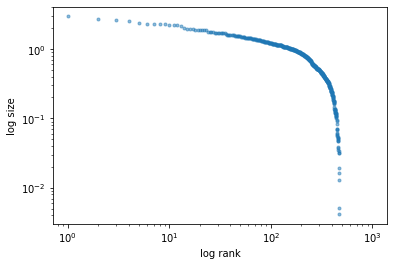

In [25]:
ll_ranksize(data1)

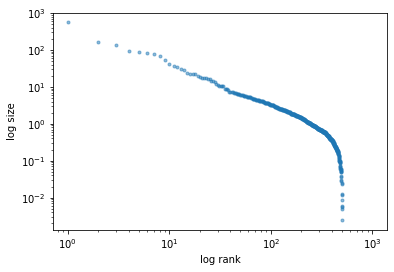

In [26]:
ll_ranksize(data2)

We can see that the loglog rank size plot for a sample not following Pareto distribution does not look like a straight line.